In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#veriyi okuyoruz ve kaydediyoruz.
data = pd.read_csv("MSFT.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,235.539993,237.240005,228.339996,228.559998,226.373062,30198600
1,2022-10-17,235.820007,238.960007,235.139999,237.529999,235.257217,28142300
2,2022-10-18,243.240005,243.929993,235.369995,238.500000,236.217941,26329600
3,2022-10-19,237.039993,239.610001,234.289993,236.479996,234.217285,19985700
4,2022-10-20,235.770004,241.309998,234.869995,236.149994,233.890427,21811000
...,...,...,...,...,...,...,...
246,2023-10-09,324.750000,330.299988,323.179993,329.820007,329.820007,19891200
247,2023-10-10,330.959991,331.100006,327.670013,328.390015,328.390015,20557100
248,2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200
249,2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100


In [3]:
#Farklı çeşitlerde grafik çizmek ve bunun görünüm şeklini belirliyoruz.
sns.set()
plt.style.use("fivethirtyeight")


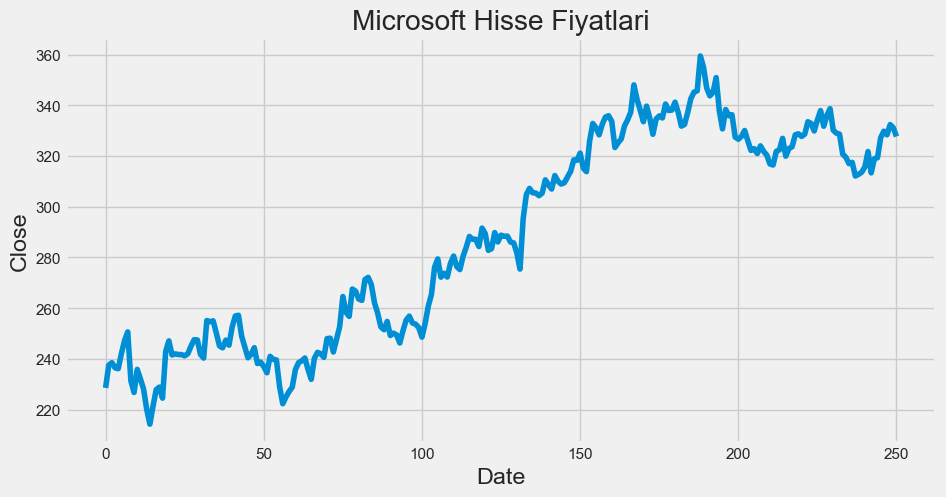

In [4]:
plt.figure(figsize = (10,5))
plt.title("Microsoft Hisse Fiyatlari")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()
# Grafiğin akışını zamana göre
# izlemek istediğimiz veriyi ise kapanış fiyatına göre belirliyoruz.


In [5]:
from datetime import datetime
for i in range(251):
    dateveri = str(data["Date"][i])
    tarihdata = datetime.strptime(dateveri,"%Y-%m-%d")
    data["Date"][i] = int((tarihdata - datetime(2022,10,14)).total_seconds() / 86400)
#gerektiğinde zaman dönüşümü yapabiliriz
#


C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\922953559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][i] = int((tarihdata - datetime(2022,10,14)).total_seconds() / 86400)
C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\922953559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][i] = int((tarihdata - datetime(2022,10,14)).total_seconds() / 86400)
C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\922953559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.914461  0.911767  0.915800  0.913209   0.916407   
Open       0.914461  1.000000  0.997654  0.998204  0.994793   0.994864   
High       0.911767  0.997654  1.000000  0.997883  0.998032   0.997986   
Low        0.915800  0.998204  0.997883  1.000000  0.997888   0.997942   
Close      0.913209  0.994793  0.998032  0.997888  1.000000   0.999957   
Adj Close  0.916407  0.994864  0.997986  0.997942  0.999957   1.000000   
Volume    -0.272041 -0.198510 -0.175849 -0.213885 -0.195192  -0.197756   

             Volume  
Date      -0.272041  
Open      -0.198510  
High      -0.175849  
Low       -0.213885  
Close     -0.195192  
Adj Close -0.197756  
Volume     1.000000  


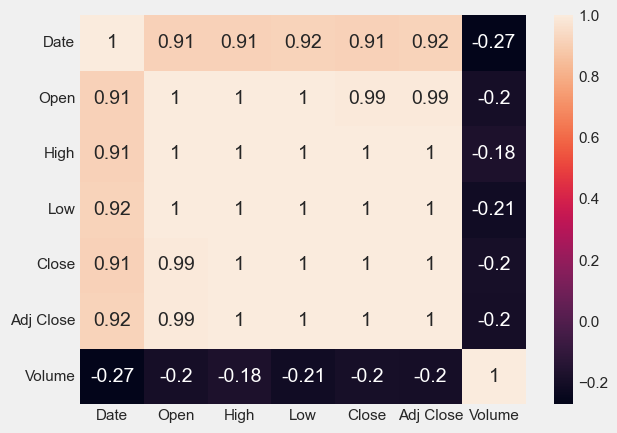

In [6]:
print(data.corr())
sns.heatmap(data.corr(),annot = True)  #annot fonksiyonu görsele bilgi ekler
plt.show()
#verilerin korelasyon ilişkisini inceliyoruz

In [7]:
x = data[["Open","High","Low",]]
y = data[["Close"]]

In [8]:
x = x.to_numpy()  #numpy için işlenebilir bir duruma getiriyoruz
y = y.to_numpy()

In [9]:
y = y.reshape(-1,1) #2 boyutlu bir array haline getiriyoruz
# korelasyon katsayısına göre tahmin edeceğimiz için -1 1 aralığında seçtik


In [10]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain , ytest = train_test_split(x,y,test_size=0.2, random_state= 42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data = {"Tahmin edilen hisse fiyatları:": ypred})
data.head

<bound method NDFrame.head of     Tahmin edilen hisse fiyatları:
0                       332.880005
1                       247.110001
2                       332.579987
3                       232.130005
4                       279.429993
5                       327.730011
6                       335.940002
7                       329.910004
8                       228.869995
9                       285.760010
10                      335.019989
11                      326.049988
12                      326.660004
13                      310.109985
14                      244.429993
15                      333.549988
16                      334.570007
17                      214.250000
18                      287.179993
19                      241.800003
20                      316.880005
21                      242.119995
22                      289.839996
23                      241.729996
24                      348.100006
25                      239.580002
26                      2

In [12]:
import matplotlib.pyplot as plt
import plotly.express as px


In [13]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
data.select_dtypes("object").nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [15]:
data.isnull().sum()
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
percentage_of_missing_data

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [16]:
plt.rcParams["figure.figsize"] = (16,4)
plt.style.use("fivethirtyeight")

C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\4147421713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["gender"],palette = "bone")


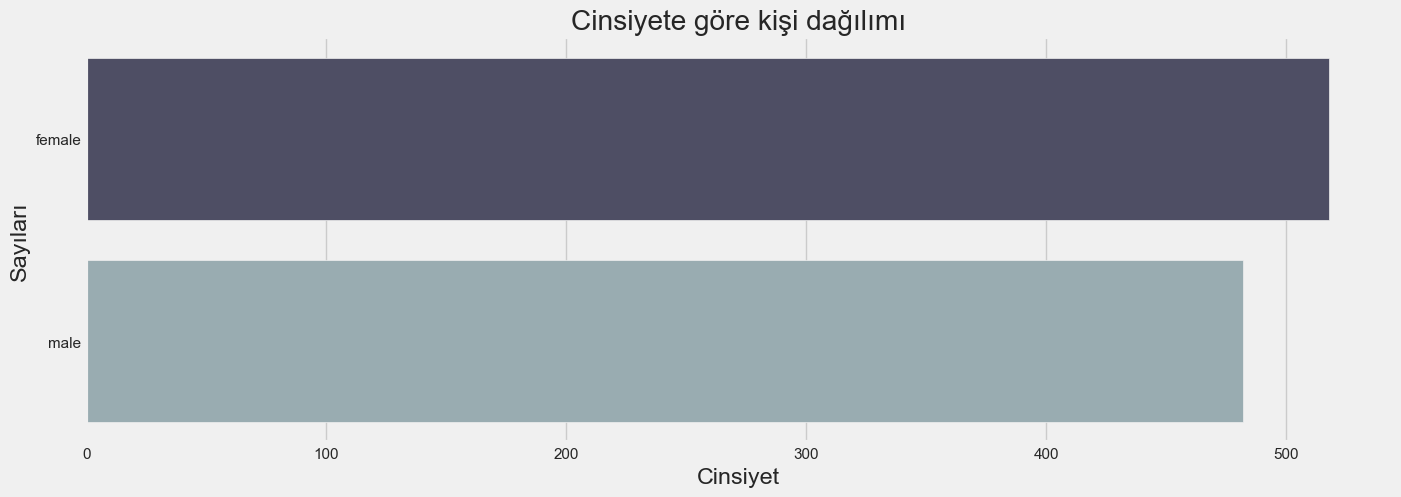

In [17]:
plt.rcParams["figure.figsize"] = (15,5)
sns.countplot(data["gender"],palette = "bone")
plt.title("Cinsiyete göre kişi dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Sayıları")
plt.show()

C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\3293644512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["race/ethnicity"],palette="pink")


Text(0.5, 1.0, 'Etkin kökene göre kişi dağılımı')

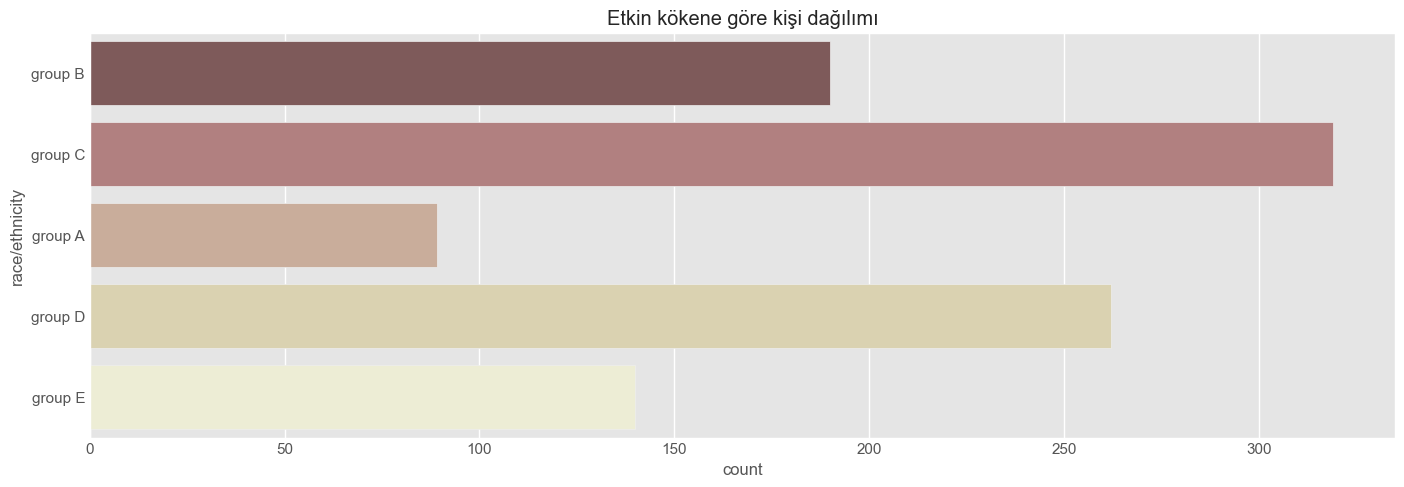

In [18]:
plt.style.use("ggplot")
sns.countplot(data["race/ethnicity"],palette="pink")
plt.title("Etkin kökene göre kişi dağılımı")

C:\Users\pwr37\AppData\Local\Temp\ipykernel_3428\2847510227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["parental level of education"],palette="pink")


Text(0.5, 1.0, 'Etkin kökene göre kişi dağılımı')

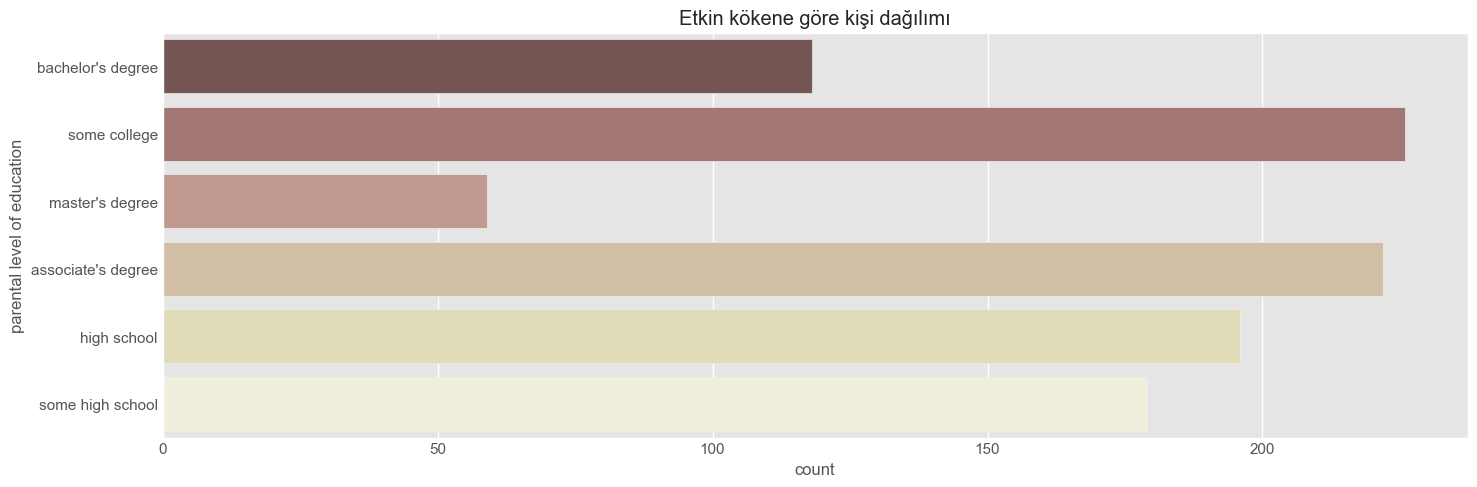

In [19]:
plt.style.use("ggplot")
sns.countplot(data["parental level of education"],palette="pink")
plt.title("Etkin kökene göre kişi dağılımı")

In [25]:
data["total_score"] = data["math score"]+data["reading score"]+data["writing score"]


In [26]:
#VERİ ETİKETLEME

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["test preparation course"] = le.fit_transform(data["test preparation course"])
data["lunch"] = le.fit_transform(data["lunch"])

data["race/ethnicity"] = data["race/ethnicity"].replace("group A",1)
data["race/ethnicity"] = data["race/ethnicity"].replace("group B",2)
data["race/ethnicity"] = data["race/ethnicity"].replace("group C",3)
data["race/ethnicity"] = data["race/ethnicity"].replace("group D",4)
data["race/ethnicity"] = data["race/ethnicity"].replace("group E",5)

data["parental level of education"] = le.fit_transform(data["parental level of education"])
data["gender"]= le.fit_transform(data["gender"])

In [30]:
x = data.iloc[:,:10]
y = data.iloc[:,:10]


In [36]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,0,2,1,1,1,72,72,74,218
1,0,3,4,1,0,69,90,88,247
2,0,2,3,1,1,90,95,93,278
3,1,1,0,0,1,47,57,44,148
4,1,3,4,1,1,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282
996,1,3,2,0,1,62,55,55,172
997,0,3,2,0,0,59,71,65,195
998,0,4,4,1,0,68,78,77,223


In [32]:
data.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130861
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691,0.185168
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299,-0.078883
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667
total_score,-0.130861,0.185168,-0.078883,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mm =MinMaxScaler()
x_train = mm.fit_transform(x_train)
y_train = mm.fit_transform(x_test)


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
y_train = pca.fit_transform(x_test)


In [ ]:
pca = PCA(n_components=2)
